In [1]:
# Import Libraries

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# Import clean data

file_path = "Output_data/spotify_clean.csv"

spotify_df = pd.read_csv(file_path, low_memory=False)

# Question 1: What Are the Dominant Music Characteristics by Decade?

In [3]:
# Look at data frame summary

spotify_df.head()

,year,artists,acousticness,danceability,energy,instrumentalness,loudness,popularity,speechiness,valence
0,1920,Mamie Smith,0.991000,0.598,0.224,0.000522,-12.628,12,0.0936,0.6340
1,1920,Screamin Jay Hawkins,0.643000,0.852,0.517,0.026400,-7.261,7,0.0534,0.9500
2,1920,Mamie Smith,0.993000,0.647,0.186,0.000018,-12.098,4,0.1740,0.6890
3,1920,Oscar Velazquez,0.000173,0.730,0.798,0.801000,-7.311,17,0.0425,0.0422
4,1920,Mixe,0.295000,0.704,0.707,0.000246,-6.036,2,0.0768,0.2990


In [4]:
# Create bins for decades

bins  = [1920,1929,1939,1949,1959,1969,1979,1989,1999,2009,2019,2030]
bin_group = ['1920-1929','1930-1939','1940-1949','1950-1959','1960-1969','1970-1979','1980-1989','1990-1999','2000-2009','2010-2019','2020 +']


In [5]:
# Sort df by bins

spotify_copy = spotify_df
spotify_copy['decade'] = pd.cut(spotify_copy['year'],bins,labels=bin_group,include_lowest=True)
spotify_copy = spotify_copy[['decade', 'artists', 'acousticness', 'danceability',
       'energy', 'instrumentalness', 'loudness', 'popularity', 'speechiness',
       'valence']]
song_count = spotify_copy.groupby('decade')['artists'].count()
song_count

decade
1920-1929     5631
1930-1939    10760
1940-1949    15491
1950-1959    20000
1960-1969    19610
1970-1979    20108
1980-1989    20074
1990-1999    20328
2000-2009    13779
2010-2019    22441
2020 +        6132
Name: artists, dtype: int64

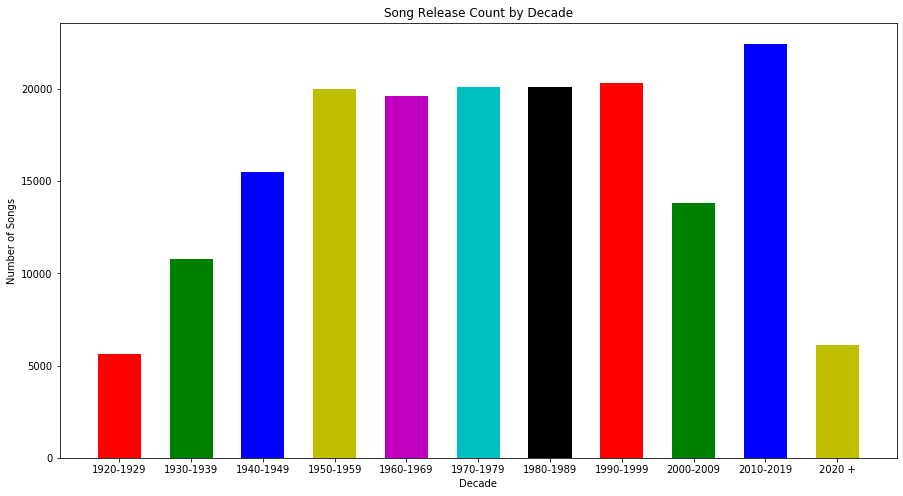

In [6]:
# Generate a bar plot showing total songs released by decade

x_axis = song_count.index
y_axis = song_count
plt.figure(figsize=(15,8))
plt.bar(x_axis, y_axis,width=.6,color='rgbymck')
plt.title('Song Release Count by Decade')
plt.ylabel('Number of Songs')
plt.xlabel('Decade')
plt.show()

In [7]:
# Generate a grouped dataframe to show average music characteristics

spotify_line = spotify_copy[['decade','acousticness','danceability','energy','instrumentalness','speechiness','valence']]
song_line = spotify_line.groupby('decade').mean()
song_line


,acousticness,danceability,energy,instrumentalness,speechiness,valence
decade,,,,,,
1920-1929,0.792778,0.585578,0.247832,0.363801,0.296223,0.545307
1930-1939,0.816630,0.559255,0.279390,0.242260,0.294554,0.567854
1940-1949,0.872126,0.473938,0.254432,0.365702,0.152777,0.488856
1950-1959,0.838657,0.478492,0.285336,0.244406,0.104190,0.478069
1960-1969,0.630583,0.492195,0.411080,0.164533,0.057077,0.548013
1970-1979,0.403245,0.524755,0.530446,0.117244,0.061482,0.583425
1980-1989,0.307810,0.544783,0.588056,0.124724,0.061901,0.561804
1990-1999,0.319077,0.564811,0.578511,0.118622,0.079917,0.544343
2000-2009,0.270265,0.566687,0.659194,0.126818,0.085232,0.536429


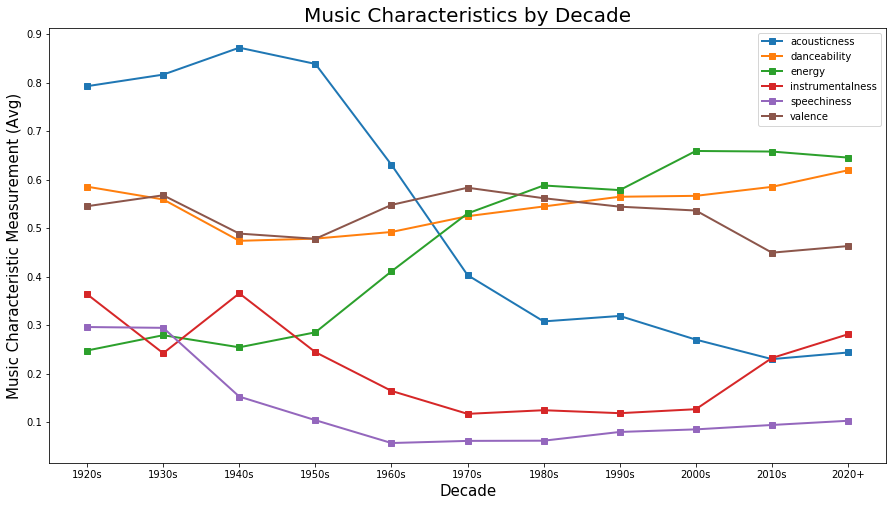

In [8]:
# Generate a line chart showing music characteristics change over decades
x_labels = ['1920s','1930s','1940s','1950s','1960s','1970s','1980s','1990s','2000s','2010s','2020+']
x_axis = x_labels
y_labels = ['acousticness','danceability','energy','instrumentalness','speechiness','valence']
y_axis = song_line[['acousticness','danceability','energy','instrumentalness','speechiness','valence']]
plt.figure(figsize=(15,8))
plt.plot(x_axis, y_axis, marker='s',linewidth=2)
plt.title('Music Characteristics by Decade',fontsize=20)
plt.ylabel('Music Characteristic Measurement (Avg)',fontsize=15)
plt.xlabel('Decade',fontsize=15)
plt.legend(y_labels)
plt.show()

# Question 2: How has Rolling Stones Music Style Evolved Over Time?

In [9]:
# Create data frame sorted by the artist, The Rolling Stones
spotify_stones = spotify_copy[spotify_copy['artists']=='The Rolling Stones']
spotify_stones.head()

,decade,artists,acousticness,danceability,energy,instrumentalness,loudness,popularity,speechiness,valence
8839,1960-1969,The Rolling Stones,0.0239,0.603,0.689,0.000003,-10.729,46,0.0304,0.7610
8868,1960-1969,The Rolling Stones,0.0383,0.723,0.863,0.031700,-7.890,77,0.0338,0.9310
8954,1960-1969,The Rolling Stones,0.1780,0.578,0.429,0.000060,-9.601,55,0.0268,0.0889
8964,1960-1969,The Rolling Stones,0.0289,0.579,0.877,0.571000,-8.830,54,0.0488,0.9000
8974,1960-1969,The Rolling Stones,0.2910,0.508,0.645,0.000003,-9.012,53,0.0395,0.4120


In [10]:
stones_count = spotify_stones.groupby('decade')['artists'].count()
stones_values = stones_count.values[4:]
stones_index = stones_count.index[4:] 
stones_index

CategoricalIndex(['1960-1969', '1970-1979', '1980-1989', '1990-1999',
                  '2000-2009', '2010-2019', '2020 +'],
                 categories=['1920-1929', '1930-1939', '1940-1949', '1950-1959', '1960-1969', '1970-1979', '1980-1989', '1990-1999', ...], ordered=True, name='decade', dtype='category')

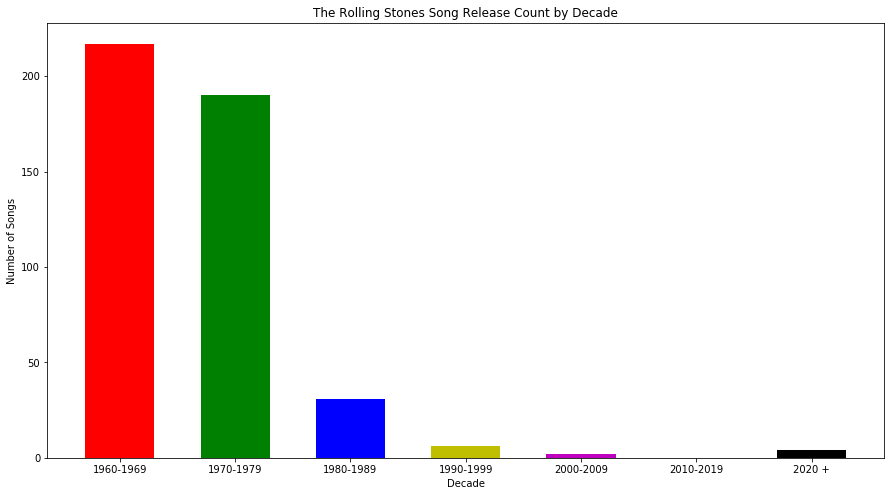

In [11]:
x_axis = stones_index
y_axis = stones_values
plt.figure(figsize=(15,8))
plt.bar(x_axis, y_axis,width=.6,color='rgbymck')
plt.title('The Rolling Stones Song Release Count by Decade')
plt.ylabel('Number of Songs')
plt.xlabel('Decade')
plt.show()

In [16]:
# Generate a grouped dataframe to show average music characteristics

stones_line = spotify_stones[['decade','acousticness','danceability','energy','instrumentalness','speechiness','valence']]
stones_line = stones_line.groupby('decade').mean()
#decade_list = ['1920-1929','1930-1939','1940-1949','1950-1959']
#stones_line = stones_line.loc['2010-2019',:].fillna(0)
#stones_line[stones_line.index!=decade_list]
#stones_line = stones_line.fillna(0)
stones_line = stones_line.dropna()
x_values = stones_line.index
y_values = stones_line.values
stones_line

,acousticness,danceability,energy,instrumentalness,speechiness,valence
decade,,,,,,
1960-1969,0.271924,0.541876,0.662226,0.119712,0.051075,0.650966
1970-1979,0.360438,0.506505,0.766558,0.278883,0.046464,0.678479
1980-1989,0.151535,0.572903,0.840097,0.136625,0.072494,0.677968
1990-1999,0.178768,0.572500,0.696667,0.059544,0.039933,0.505667
2000-2009,0.008875,0.405500,0.785000,0.032738,0.080850,0.498000
2020 +,0.046190,0.306000,0.754250,0.051245,0.054125,0.324550


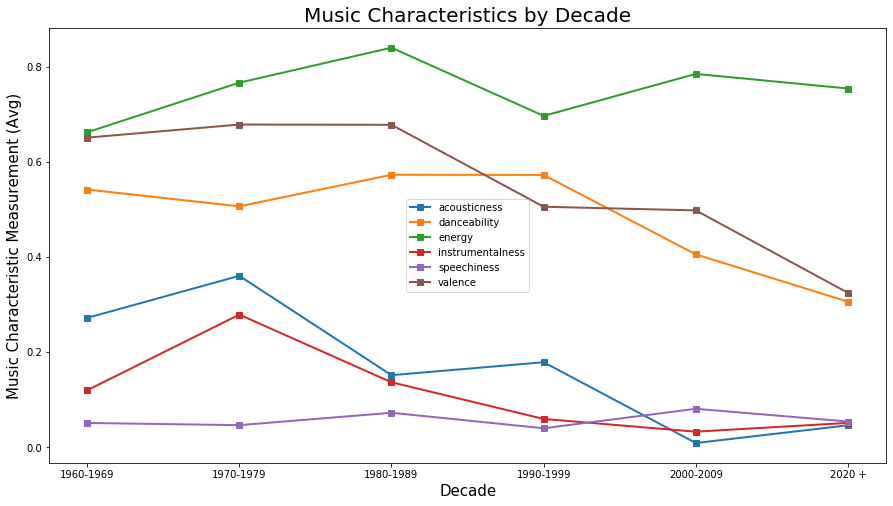

In [17]:
# Generate a line chart showing music characteristics change over decades
x_labels = ['1960s','1970s','1980s','1990s','2000s','2010s','2020+']
y_labels = ['acousticness','danceability','energy','instrumentalness','speechiness','valence']
#y_axis = song_line[['acousticness','danceability','energy','instrumentalness','speechiness','valence']]
plt.figure(figsize=(15,8))
plt.plot(x_values, y_values, marker='s',linewidth=2)
plt.title('Music Characteristics by Decade',fontsize=20)
plt.ylabel('Music Characteristic Measurement (Avg)',fontsize=15)
plt.xlabel('Decade',fontsize=15)
plt.legend(y_labels)
plt.show()